# USED CAR PRICE PREDICTION MODEL

In [1]:
# Importing Necessary Library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
# Load Data 
data = pd.read_csv('/kaggle/input/playground-series-s4e9/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e9/test.csv')

# 1. DATA READING

In [3]:
data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900


In [4]:
data.shape

(188533, 13)

In [5]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [6]:
data['transmission'].unique()

array(['A/T', 'Transmission w/Dual Shift Mode', '7-Speed A/T',
       '8-Speed A/T', '10-Speed Automatic', '1-Speed A/T', '6-Speed A/T',
       '10-Speed A/T', '9-Speed A/T', '8-Speed Automatic',
       '9-Speed Automatic', '5-Speed A/T', 'Automatic',
       '7-Speed Automatic with Auto-Shift', 'CVT Transmission',
       '5-Speed M/T', 'M/T', '6-Speed M/T', '6-Speed Automatic',
       '4-Speed Automatic', '7-Speed M/T', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '6-Speed Manual', 'Transmission Overdrive Switch',
       '8-Speed Automatic with Auto-Shift', '7-Speed Manual',
       '7-Speed Automatic', '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O', 'F', 'CVT-F',
       '8-Speed Manual', 'Manual', '–', '2', '6 Speed At/Mt',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T', '7-Speed',
       'Variable', 'Single-Speed Fixed Gear', '8-SPEED AT',


In [7]:
data[(data.transmission.str.contains('Automatic')) | (data.transmission.str.contains('A/T'))]['transmission'].unique()

array(['A/T', '7-Speed A/T', '8-Speed A/T', '10-Speed Automatic',
       '1-Speed A/T', '6-Speed A/T', '10-Speed A/T', '9-Speed A/T',
       '8-Speed Automatic', '9-Speed Automatic', '5-Speed A/T',
       'Automatic', '7-Speed Automatic with Auto-Shift',
       '6-Speed Automatic', '4-Speed Automatic', '2-Speed A/T',
       '1-Speed Automatic', 'Automatic CVT', '4-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed Automatic',
       '9-Speed Automatic with Auto-Shift',
       '6-Speed Automatic with Auto-Shift',
       '6-Speed Electronically Controlled Automatic with O',
       '5-Speed Automatic', '2-Speed Automatic', '8-SPEED A/T',
       '10-Speed Automatic with Overdrive', '7-Speed DCT Automatic'],
      dtype=object)

In [8]:
data['brand'].unique()

array(['MINI', 'Lincoln', 'Chevrolet', 'Genesis', 'Mercedes-Benz', 'Audi',
       'Ford', 'BMW', 'Tesla', 'Cadillac', 'Land', 'GMC', 'Toyota',
       'Hyundai', 'Volvo', 'Volkswagen', 'Buick', 'Rivian', 'RAM',
       'Hummer', 'Alfa', 'INFINITI', 'Jeep', 'Porsche', 'McLaren',
       'Honda', 'Lexus', 'Dodge', 'Nissan', 'Jaguar', 'Acura', 'Kia',
       'Mitsubishi', 'Rolls-Royce', 'Maserati', 'Pontiac', 'Saturn',
       'Bentley', 'Mazda', 'Subaru', 'Ferrari', 'Aston', 'Lamborghini',
       'Chrysler', 'Lucid', 'Lotus', 'Scion', 'smart', 'Karma',
       'Plymouth', 'Suzuki', 'FIAT', 'Saab', 'Bugatti', 'Mercury',
       'Polestar', 'Maybach'], dtype=object)

In [9]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [10]:
data['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [11]:
data['accident'].describe()

count            186081
unique                2
top       None reported
freq             144514
Name: accident, dtype: object

In [12]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

# 2. DATA VISUALIZATION

<Axes: xlabel='brand', ylabel='price'>

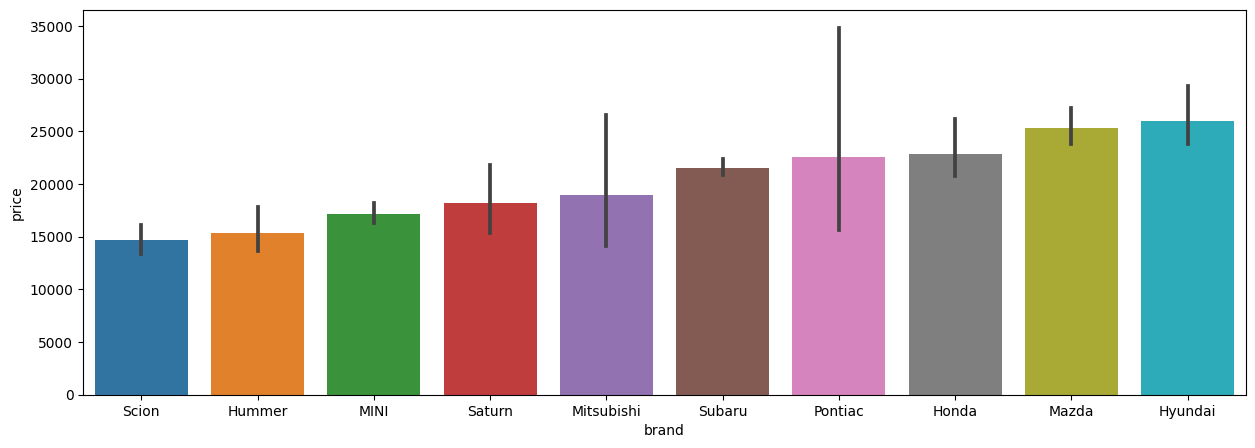

In [13]:
plt.figure(figsize=(15,5))
brand_order = data.groupby('brand')['price'].mean().sort_values(ascending = True).head(10).index
sns.barplot(data=data , x='brand' ,y='price',order = brand_order)

In [14]:
# Hyundai, mazda, honda, Pontiac, Subaru are the top 5 Expensive Brand

<Axes: xlabel='brand', ylabel='count'>

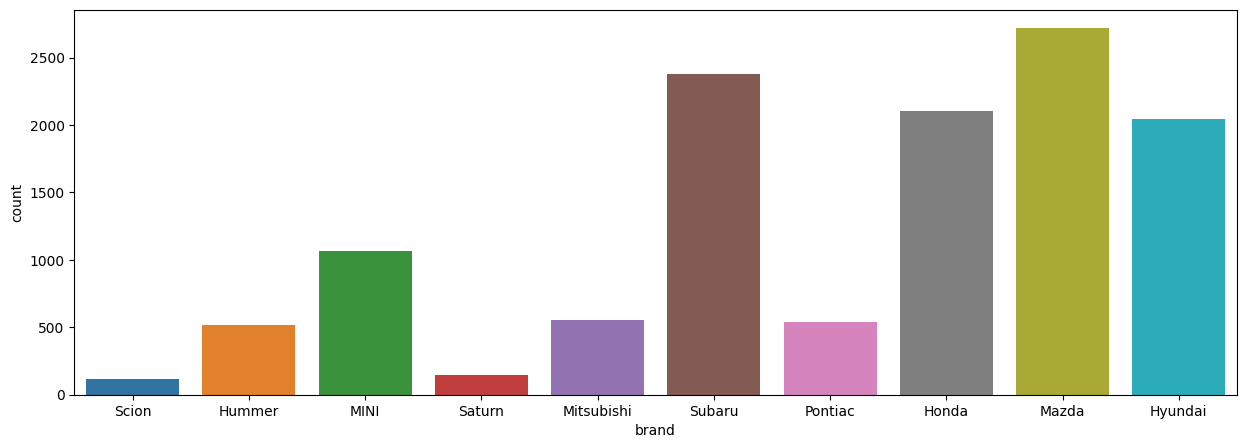

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(data=data , x='brand' ,order = brand_order)

In [16]:
# Mazda Manufactures the most number of cars 
# Pontiac number of cars are low still in fourth place interms of expensive cars(mean of all models) this implies that Pontiac manufactures low but expensive cars


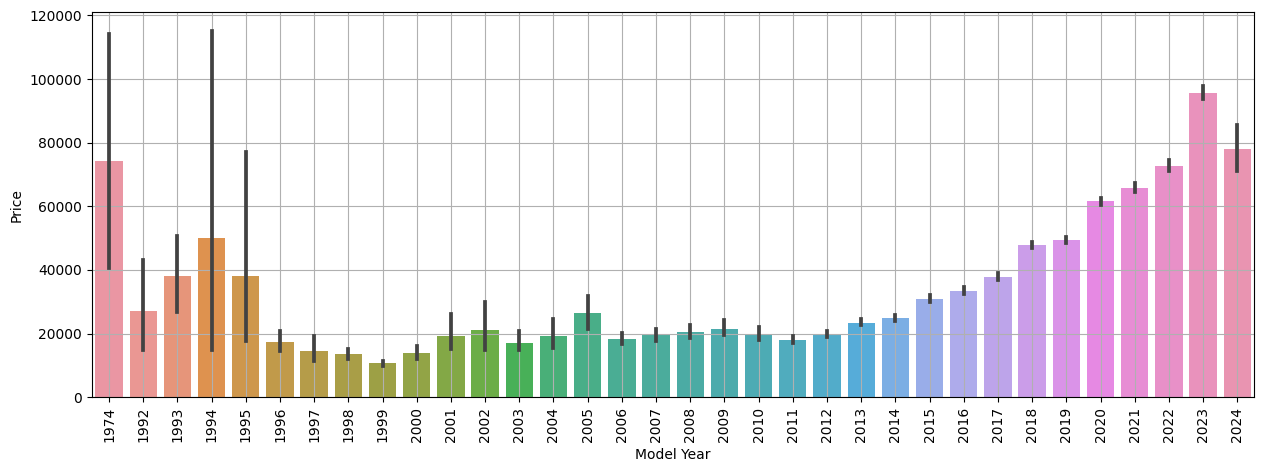

In [17]:
plt.figure(figsize=(15,5))
sns.barplot(data=data , x='model_year',y='price' )
plt.grid()
plt.xticks( rotation = 'vertical')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

In [18]:
#it can be seen that older vintage cars are high in value i.e it has many outliers 

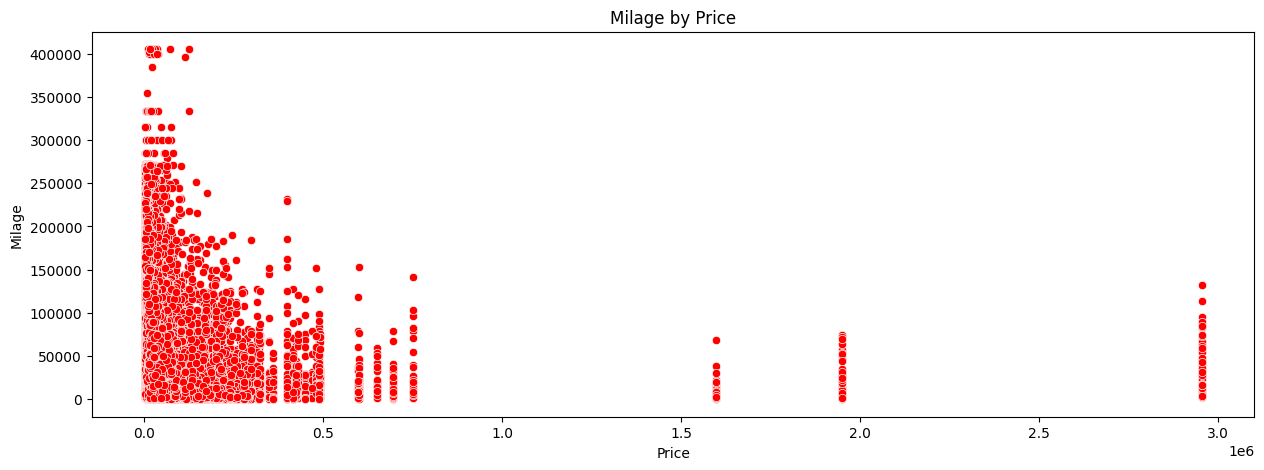

In [19]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,y='milage' , x='price' , color = 'r' )
plt.title('Milage by Price')
plt.xlabel('Price')
plt.ylabel('Milage')
plt.show()

In [20]:
# milage is inversely correlated with Price of the car

Text(0.5, 1.0, 'Count of Car Fuel type')

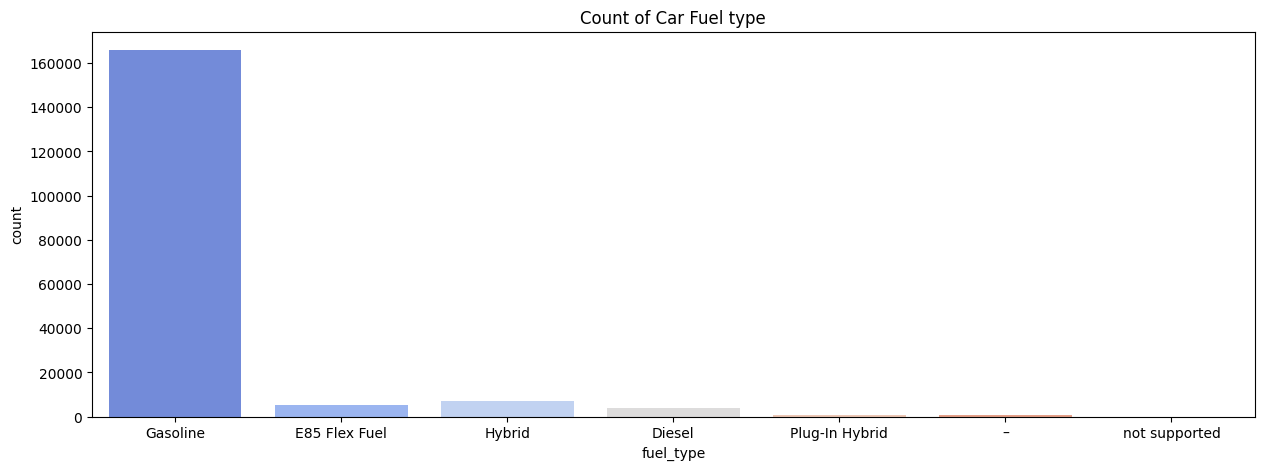

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(data=data,x='fuel_type',palette = 'coolwarm')
plt.title('Count of Car Fuel type')

In [22]:
# Most of the car have gasoline as fuel type

Text(0, 0.5, 'Milage')

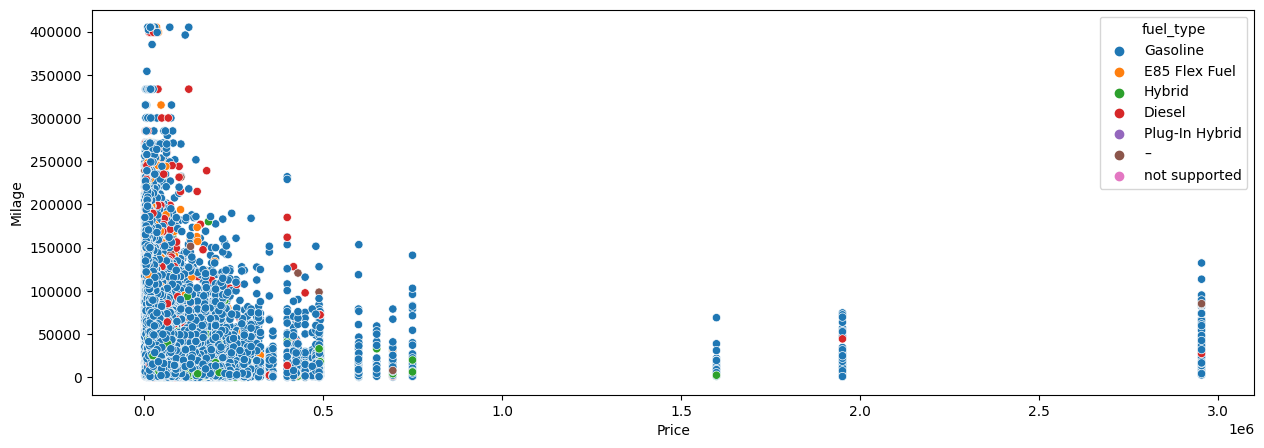

In [23]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=data,y='milage' , x='price' ,hue='fuel_type')
plt.xlabel('Price')
plt.ylabel('Milage')

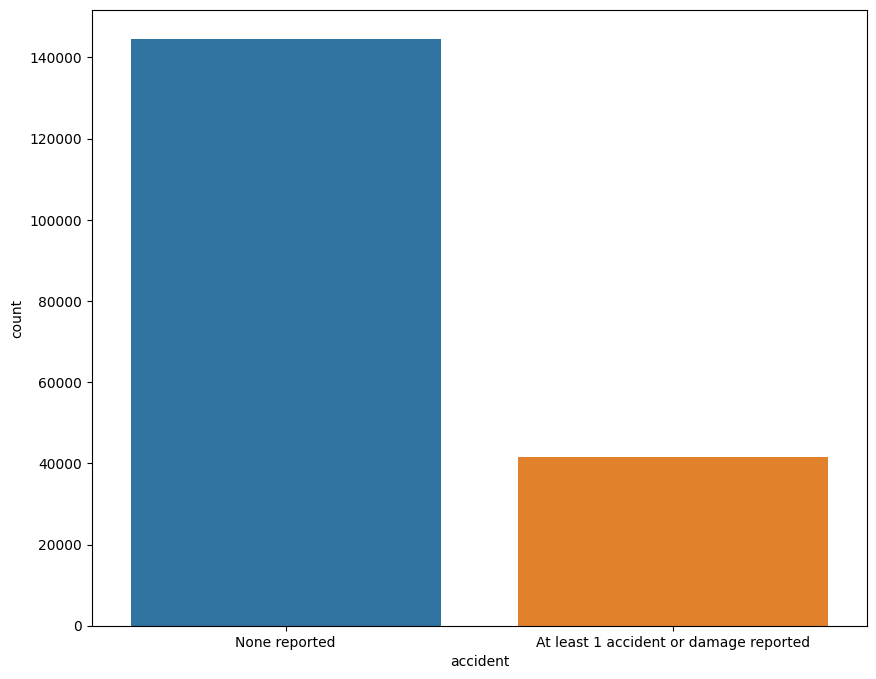

In [24]:
plt.figure(figsize=(10,8))
ax = sns.countplot(data=data,x='accident')

Text(0, 0.5, 'Count')

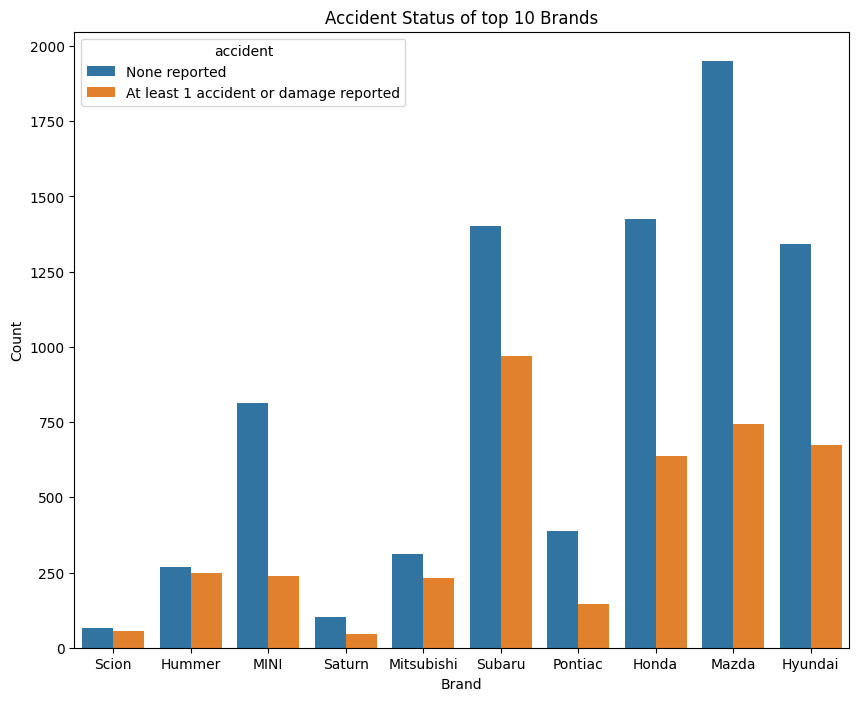

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(data=data , x='brand' , hue='accident', order = brand_order)
plt.title('Accident Status of top 10 Brands')
plt.xlabel('Brand')
plt.ylabel('Count')

In [26]:
#it can be seen most Hyundai Mazda Honda Subaru cars meet the most of accident which is completely normal as also these brands manufacture the most number of cars.

<Axes: xlabel='clean_title', ylabel='count'>

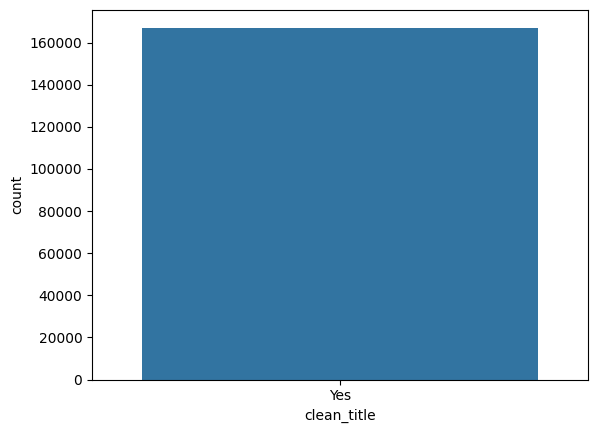

In [27]:
sns.countplot(data=data , x = 'clean_title')

In [28]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [29]:
# defining the function that will plot and chck the skewness 
def skewness(data,features) :
    for feature in features :
        #plot of feature
        sns.histplot(data[feature],kde=True)
        plt.title('Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.show()
        # Calculate skewness
        skewness = data[feature].skew()
        print(f'Skewness: {skewness}')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


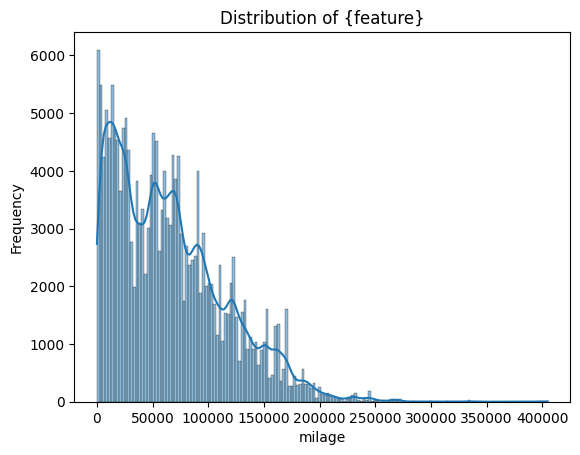

Skewness: 0.8950620098363095


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


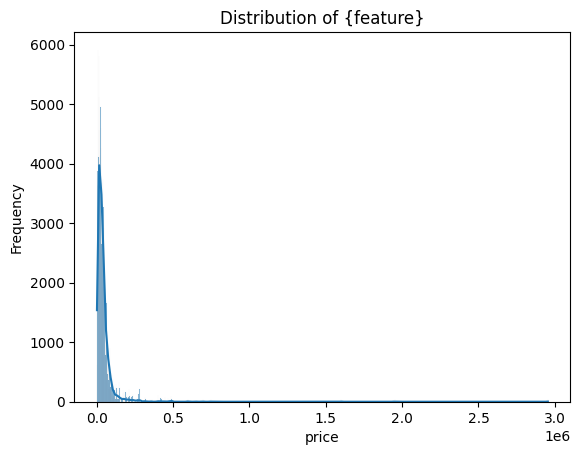

Skewness: 20.268452710951134


In [30]:
features = ['milage','price']
skewness(data,features)

In [31]:
# Both of this feature is highly right-skewed.

# 3. DATA CLEANING

In [32]:
data.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [33]:
data['accident'].fillna('None reported' ,inplace = True)

/tmp/ipykernel_93/3972989972.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['accident'].fillna('None reported' ,inplace = True)


In [34]:
data.shape

(188533, 13)

In [35]:
data['clean_title'].fillna('No',inplace = True)

/tmp/ipykernel_93/2653428194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['clean_title'].fillna('No',inplace = True)


In [36]:
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [37]:
data['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [38]:
# fuel type contains three type of null value i.e.(nan, 'not supported','-')
# we can find the missing value of "fuel type" from their cars "engine" 
print("Number of cars having fuel_type == `nan` & engine != `electric`")
print(data[(data.fuel_type.isnull()) & (data.engine.apply(lambda x : 'Electric' not in x.split()))][['engine','fuel_type']].count())
print("_____________________________________________________________")
print("Number of cars having fuel_type == `nan` & engine == `electric`")
print(data[(data.fuel_type.isnull()) & (data.engine.apply(lambda x : 'Electric' in x.split()))][['engine','fuel_type']].count())

Number of cars having fuel_type == `nan` & engine != `electric`
engine       224
fuel_type      0
dtype: int64
_____________________________________________________________
Number of cars having fuel_type == `nan` & engine == `electric`
engine       4859
fuel_type       0
dtype: int64


In [39]:
data['fuel_type'] = data.apply(
    lambda row: 'Electric' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Electric', 'AH', 'Battery', 'Standard', 'kW'))
    else 'Plug-In Hybrid' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('DOHC', 'Plug-In'))
    else 'Hybrid' if pd.isnull(row['fuel_type']) and 'Hybrid' in row['engine'].split()
    else 'E85 Flex Fuel' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Flex', 'Flexible'))
    else 'Diesel' if pd.isnull(row['fuel_type']) and 'Diesel' in row['engine'].split()
    else 'Gasoline' if pd.isnull(row['fuel_type'])  # Use Gasoline if fuel_type is null
    else row['fuel_type'],  # Retain original value if not null
    axis=1
)

In [40]:
#Now lets check how many value of fuel_type == "-"
print("fuel_type and engine both `-`")
print(data[(data.fuel_type == '–') & (data.engine == '–') ][['engine','fuel_type']].count())
print("______________________________________")
print("Only fuel_type `-`")
print(data[(data.fuel_type == '–') & (data.engine != '–') ][['engine','fuel_type']].count())

fuel_type and engine both `-`
engine       772
fuel_type    772
dtype: int64
______________________________________
Only fuel_type `-`
engine       9
fuel_type    9
dtype: int64


In [41]:
# Replacing '–' with 'Unknown' for both fuel_type and engine where both are '-'
data.loc[(data['fuel_type'] == '–') & (data['engine'] == '–'), ['fuel_type', 'engine']] = 'Unknown'

In [42]:
data['fuel_type'].replace('–', 'Gasoline', inplace=True) # manually checked 

/tmp/ipykernel_93/3693100997.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['fuel_type'].replace('–', 'Gasoline', inplace=True) # manually checked


In [43]:
data[data.fuel_type == 'not supported'][['engine','fuel_type']]

,engine,fuel_type
4823,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,not supported
18000,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,not supported
19182,182.0HP Electric Motor Hydrogen Fuel,not supported
27199,175.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,not supported
33030,182.0HP Electric Motor Hydrogen Fuel,not supported
60717,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,not supported
74096,182.0HP Electric Motor Hydrogen Fuel,not supported
86897,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,not supported
94425,550.0HP 4.8L 8 Cylinder Engine Gasoline Fuel,not supported
127066,151.0HP Electric Motor Hydrogen Fuel,not supported


In [44]:
#As every engine here is gasoline and electric we can manually change this
data['fuel_type'] = data.apply(
                                lambda row : 'Gasoline' if any(keyword in row['engine'] for keyword in ['Gasoline', 'L', 'Liter']) else 'Electric'
                                if row['fuel_type']=='not supported' else row['fuel_type'],
                                axis = 1 )

In [45]:
data[data.fuel_type == 'not supported'][['engine','fuel_type']]

,engine,fuel_type


In [46]:
data.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [47]:
test.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64

In [48]:
test['accident'].fillna('None reported',inplace = True)

/tmp/ipykernel_93/780368835.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['accident'].fillna('None reported',inplace = True)


In [49]:
#test[test['fuel_type'].isna()].head(500)

In [50]:
test.fuel_type.unique()

array(['Gasoline', 'Hybrid', 'Diesel', 'E85 Flex Fuel', nan,
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [51]:
test[test.fuel_type == 'Gasoline']['engine'].head(10)

0      240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
2                   3.5L V6 24V PDI DOHC Twin Turbo
3                                    2.0 Liter TFSI
4      252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
5      285.0HP 4.8L 8 Cylinder Engine Gasoline Fuel
6     270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
7                              3.8L V6 24V GDI DOHC
8      536.0HP 5.5L 8 Cylinder Engine Gasoline Fuel
9     365.0HP 3.3L V6 Cylinder Engine Gasoline Fuel
10    303.0HP 3.7L V6 Cylinder Engine Gasoline Fuel
Name: engine, dtype: object

In [52]:
test['fuel_type'] = test.apply(
    lambda row: 'Electric' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Electric', 'AH', 'Battery', 'Standard', 'kW'))
    else 'Plug-In Hybrid' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('DOHC', 'Plug-In'))
    else 'Hybrid' if pd.isnull(row['fuel_type']) and 'Hybrid' in row['engine'].split()
    else 'E85 Flex Fuel' if pd.isnull(row['fuel_type']) and all(feature in row['engine'].split() for feature in ('Flex', 'Flexible'))
    else 'Diesel' if pd.isnull(row['fuel_type']) and 'Diesel' in row['engine'].split()
    else 'Gasoline' if pd.isnull(row['fuel_type'])  # Use Gasoline if fuel_type is null
    else row['fuel_type'],  # Retain original value if not null
    axis=1
)

In [53]:
test[(test.fuel_type.isnull())][['engine','fuel_type']]

,engine,fuel_type


In [54]:
test[test.fuel_type == '–'][['engine','fuel_type']]

,engine,fuel_type
704,–,–
892,–,–
991,–,–
1008,–,–
1011,–,–
...,...,...
124669,–,–
124785,–,–
124879,–,–
125101,–,–


In [55]:
# Replace '–' with 'Unknown' for both fuel_type and engine where both are '-'
test.loc[(test['fuel_type'] == '–') & (test['engine'] == '–'), ['fuel_type', 'engine']] = 'Unknown'


In [56]:
test[(test.fuel_type == '–') ][['engine','fuel_type']]

,engine,fuel_type
12128,181.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,–
14867,250.0HP 5.9L Straight 6 Cylinder Engine Diesel...,–
16091,429.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,–
52090,2.5 Liter,–
54262,115.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,–
72030,245.0HP 5.9L Straight 6 Cylinder Engine Diesel...,–
76736,236.0HP 4.0L V6 Cylinder Engine Gasoline Fuel,–
80462,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,–
83074,560.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,–
91041,210.0HP 3.7L V6 Cylinder Engine Gasoline Fuel,–


In [57]:
test['fuel_type'] = test.apply(
    lambda row: 'Gasoline' if (row['fuel_type'] == '–') and ('Gasoline' in row['engine'].split() and 'Liter' in row['engine'].split())
    else 'Diesel',
    axis=1
)

In [58]:
test['clean_title'].fillna('No',inplace = True)

/tmp/ipykernel_93/1362350193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['clean_title'].fillna('No',inplace = True)


In [59]:
test.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [60]:
test.shape

(125690, 12)

<Axes: >

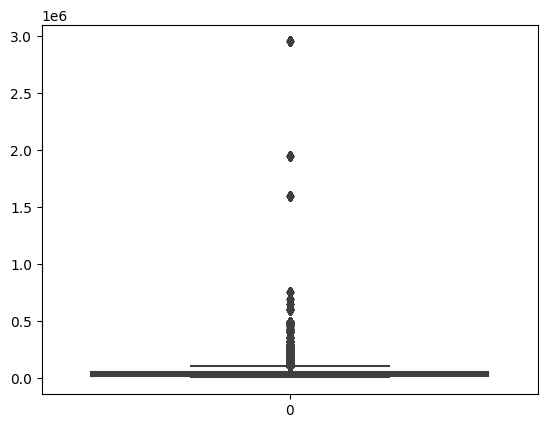

In [61]:
sns.boxplot(data['price'])

<Axes: >

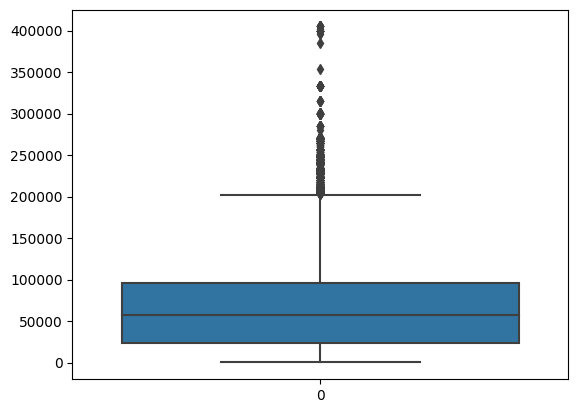

In [62]:
#checking for outliers
sns.boxplot(data['milage'])

In [63]:
# Removing the Outliers
numerical_data = ['price','milage']
def outlier(df,ft) :
    upper_limit = df[ft].mean() + 3*df[ft].std()
    lower_limit = df[ft].mean() - 3*df[ft].std()
    ls =  df.index[(df[ft] < lower_limit) | (df[ft] > upper_limit)]
    return ls
index = []
for col in numerical_data :
    index.extend(outlier(data,col))
index = sorted(set(index))
def remove_outlier(df,ls) :
    df = df.drop(ls,inplace = True)
    return df 
remove_outlier(data,index)


# 4. FEATURE ENGINEERING

In [64]:
# Extracting information from Transmission column

In [65]:
# Here from transmission we can extract type of transmission('automatic','manual','other') and number of gears in a car

In [66]:
data['transmission'].head(10)

0                               A/T
1                               A/T
2                               A/T
3    Transmission w/Dual Shift Mode
4                       7-Speed A/T
5                               A/T
6                       8-Speed A/T
7                               A/T
8                10-Speed Automatic
9    Transmission w/Dual Shift Mode
Name: transmission, dtype: object

In [67]:
#this function will extract transmission type
def transmission_type(trans) :
    if 'Automatic' in trans or 'A/T' in  trans :
        return 'Automatic'
    elif 'Manual' in trans or 'M/T' in trans :
        return 'Manual'
    else :
        return 'Other'
import re
#this function will extract Number of gears
def gear(trans) :
    match = re.search(r'(\d+)-Speed',trans)
    if match : 
        return int(match.group(1))
    else :
        return np.nan
data['trans_type'] = data['transmission'].apply(transmission_type)
data['gear'] = data['transmission'].apply(gear)

In [68]:
#applying this to test as well
test['trans_type'] = test['transmission'].apply(transmission_type)
test['gear'] = test['transmission'].apply(gear)

In [69]:
data.groupby(['brand', 'model', 'trans_type','fuel_type']).gear.value_counts().head(5)

brand  model                  trans_type  fuel_type  gear
Acura  330 i xDrive           Automatic   Gasoline   6.0     1
       ATS 2.0L Turbo Luxury  Automatic   Gasoline   8.0     1
       Acadia SLE-1           Automatic   Gasoline   9.0     1
       Air Pure               Automatic   Gasoline   1.0     1
       CC Sport               Manual      Gasoline   6.0     1
Name: count, dtype: int64

In [70]:
# Extracting Information from Engine Column
# from column engine we can extract three features i.e. horsepower, engine_size, Number of Cylinders

In [71]:
import re 
def extract_engine_features(raw) :
    engine_info = raw['engine']
    
    #Extracting HorsePower of Car
    hp_match = re.search(r'(\d+\.?\d*)HP' , engine_info)
    horsepower = float(hp_match.group(1)) if hp_match else None
    
    #Extracting Engine Size of Car
    size_match = re.search(r'(\d+\.?\d*)L' , engine_info)
    engine_size = float(size_match.group(1)) if size_match else 0
    
    #Extracting Cylinders in Car
    cyl_match = re.search(r'(\d+)\s+Cylinder|V(\d+)' , engine_info)
    cylinders = int(cyl_match.group(1) or cyl_match.group(2)) if cyl_match else None
    
    return pd.Series([horsepower, engine_size, cylinders])
data[['horsepower', 'engine_size', 'cylinders']] = data.apply(extract_engine_features, axis=1)

In [72]:
test[['horsepower', 'engine_size', 'cylinders']] = test.apply(extract_engine_features, axis=1)

In [73]:
data.head(
)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,trans_type,gear,horsepower,engine_size,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Automatic,NaN,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Automatic,NaN,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Gasoline,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Automatic,NaN,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Other,NaN,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Automatic,7.0,208.0,2.0,4.0


In [74]:
test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,trans_type,gear,horsepower,engine_size,cylinders
0,188533,Land,Rover LR2 Base,2015,98000,Diesel,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,Automatic,6.0,240.0,2.0,4.0
1,188534,Land,Rover Defender SE,2020,9142,Diesel,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,Automatic,8.0,395.0,3.0,6.0
2,188535,Ford,Expedition Limited,2022,28121,Diesel,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,No,Automatic,10.0,NaN,3.5,6.0
3,188536,Audi,A6 2.0T Sport,2016,61258,Diesel,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,No,Automatic,NaN,NaN,0.0,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Diesel,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,Automatic,NaN,252.0,2.0,4.0


In [75]:
print(f'Null values in data: \n{data.isnull().sum()}')
print("_____________________________________")
print(f'Null values in test: \n{test.isnull().sum()}')

Null values in data: 
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
trans_type          0
gear            83348
horsepower      32630
engine_size         0
cylinders       21529
dtype: int64
_____________________________________
Null values in test: 
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
trans_type          0
gear            56189
horsepower      22181
engine_size         0
cylinders       14529
dtype: int64


In [76]:
data[data.cylinders.isnull()][['engine']].head() #awcs we cannot get any data from ENGINEs detail

,engine
11,Electric Motor Electric Fuel System
32,518.0HP Electric Motor Electric Fuel System
44,835.0HP Electric Motor Electric Fuel System
51,Dual Motor - Standard
52,518.0HP Electric Motor Electric Fuel System


In [77]:
# as we know a specific engines model with specific 'engine size' & 'number of cylinder' will produce same 'HORSEPOWER'
#so we will use this theory to fill the null value of horsepower 
#incase a specific engine create different hp then we will fill the mode 
data.groupby(['brand','model','engine_size','cylinders']).horsepower.value_counts().head(20)

brand  model                       engine_size  cylinders  horsepower
Acura  300 Touring                 3.5          6.0        250.0          1
       330 i xDrive                3.0          6.0        320.0          1
       335 is                      3.0          6.0        320.0          1
       ATS 2.0L Turbo Luxury       2.0          4.0        252.0          1
       CC Sport                    2.4          4.0        201.0          1
       CLK-Class CLK 350           3.5          6.0        268.0          2
       CX-30 Base                  2.0          4.0        200.0          1
       Cascada Base                2.0          4.0        200.0          1
       Corvette Stingray w/1LT     6.2          8.0        490.0          1
       ES 350 Base                 3.5          6.0        268.0          1
       Forte LXS                   2.0          4.0        147.0          1
       ILX 2.0L w/Premium Package  2.0          4.0        150.0         24
                  

In [78]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
data['horsepower']=data.groupby(['brand','model','engine_size','cylinders']).horsepower.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['horsepower']=test.groupby(['brand','model','engine_size','cylinders']).horsepower.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [79]:
data['cylinders']=data.groupby(['brand','model','engine_size','horsepower']).cylinders.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['cylinders']=test.groupby(['brand','model','engine_size','horsepower']).cylinders.transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [80]:
data['gear'] = data.groupby(['brand', 'model', 'trans_type','fuel_type'])['gear'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))
test['gear'] = test.groupby(['brand', 'model', 'trans_type','fuel_type'])['gear'].transform(lambda x : x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

In [81]:
data.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type           0
engine              0
transmission        0
ext_col             0
int_col             0
accident            0
clean_title         0
price               0
trans_type          0
gear            21658
horsepower      23348
engine_size         0
cylinders       23348
dtype: int64

In [82]:
print(f'percent of null "gear" left:  \n{data.gear.isnull().sum()/data.shape[0]*100}')
print('_________________________________')
print(f'percent of null "cylinders" left:  \n{data.cylinders.isnull().sum()/data.shape[0]*100}')
print('_________________________________')
print(f'percent of null "horsepower" left:  \n{data.horsepower.isnull().sum()/data.shape[0]*100}')

percent of null "gear" left:  
11.642834103859801
_________________________________
percent of null "cylinders" left:  
12.551338565745617
_________________________________
percent of null "horsepower" left:  
12.551338565745617


### Creating model to fill all other missing value

In [83]:
# Fillling HorsePower

In [84]:
# Fill remaining NaN values for horsepower using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Subset data into complete and incomplete cases
complete_hp = data[(data['horsepower'].notnull()) ]
incomplete_hp = data[(data['horsepower'].isnull())]

# Train the model on complete data
X_train_hp = pd.get_dummies(complete_hp[['engine_size','brand','model_year','trans_type']],drop_first =True,dtype = int)
y_train_hp = complete_hp['horsepower']


#cross_val_score(RandomForestRegressor(),X_train_hp, y_train_hp,cv=5)

In [85]:
model_hp = RandomForestRegressor()
model_hp.fit(X_train_hp, y_train_hp)

# Predict missing horsepower values
X_null_hp = pd.get_dummies(incomplete_hp[['engine_size', 'brand', 'model_year','trans_type']],drop_first = True , dtype =int)
X_null_hp = X_null_hp.reindex(columns=X_train_hp.columns, fill_value=0) #reindex(..., fill_value=0) ensures all required features exist, even if they weren't in X_null_hp.
data.loc[data['horsepower'].isnull(), 'horsepower'] = model_hp.predict(X_null_hp)

incomplete_test_hp = test[(test['horsepower'].isnull())]
X2_null_hp = pd.get_dummies(incomplete_test_hp[['engine_size', 'brand', 'model_year','trans_type']],drop_first = True , dtype =int)
X2_null_hp = X2_null_hp.reindex(columns=X_train_hp.columns, fill_value=0)
test.loc[test['horsepower'].isnull(), 'horsepower'] = model_hp.predict(X2_null_hp)

In [86]:
# Filling Cylinders

In [87]:
# Fill remaining NaN values for horsepower using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Subset data into complete and incomplete cases
complete_cy = data[(data['cylinders'].notnull()) ]
incomplete_cy = data[(data['cylinders'].isnull())]

# Train the model on complete data
X_train_cy = pd.get_dummies(complete_cy[['engine_size','brand','model_year','trans_type','horsepower']],drop_first =True,dtype = int)
y_train_cy = complete_cy['cylinders']


#cross_val_score(RandomForestRegressor(),X_train_hp, y_train_hp,cv=5)

In [88]:
model_cy = RandomForestRegressor()
model_cy.fit(X_train_cy, y_train_cy)


# Predict missing horsepower values
X_null_cy = pd.get_dummies(incomplete_cy[['engine_size', 'brand', 'model_year','trans_type','horsepower']],drop_first = True , dtype =int)
X_null_cy = X_null_cy.reindex(columns=X_train_cy.columns, fill_value=0)
data.loc[data['cylinders'].isnull(), 'cylinders'] = model_cy.predict(X_null_cy)

incomplete_test_cy = test[(test['cylinders'].isnull())]
X2_null_cy = pd.get_dummies(incomplete_test_cy[['engine_size', 'brand', 'model_year','trans_type','horsepower']],drop_first = True , dtype =int)
X2_null_cy = X2_null_cy.reindex(columns=X_train_cy.columns, fill_value=0)
test.loc[test['cylinders'].isnull(), 'cylinders'] = model_cy.predict(X2_null_cy)

In [89]:
#Finding Gears

In [90]:
# Fill remaining NaN values for horsepower using a predictive model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
# Subset data into complete and incomplete cases
complete_g = data[(data['gear'].notnull()) ]
incomplete_g = data[(data['gear'].isnull())]

# Train the model on complete data
X_train_g = pd.get_dummies(complete_g[['engine_size','brand','model_year','trans_type','fuel_type','horsepower','cylinders',]],drop_first =True,dtype = int)
y_train_g = complete_g['gear']

# X_train, X_test, y_train, y_test = train_test_split(X_train_hp,y_train_hp,test_size=0.3)

#score=cross_val_score(RandomForestRegressor(),X_train, y_train,cv=5)

#model_hp = RandomForestRegressor()
#model_hp.fit(X_test, y_test)

#print(f'train score : {score.mean()}')
#print(f'test score : {model_hp.score(X_test,y_test)}')

In [91]:
model_g = RandomForestRegressor()
model_g.fit(X_train_g, y_train_g)


# Predict missing horsepower values
X_null_g = pd.get_dummies(incomplete_g[['engine_size', 'brand', 'model_year','trans_type','horsepower','cylinders','fuel_type']],drop_first = True , dtype =int)
X_null_g = X_null_g.reindex(columns=X_train_g.columns, fill_value=0)
data.loc[data['gear'].isnull(), 'gear'] = model_g.predict(X_null_g)

incomplete_test_g = test[(test['gear'].isnull())]
X2_null_g = pd.get_dummies(incomplete_test_g[['engine_size', 'brand', 'model_year','trans_type','horsepower','cylinders','fuel_type']],drop_first = True , dtype =int)
X2_null_g = X2_null_g.reindex(columns=X_train_g.columns, fill_value=0)
test.loc[test['gear'].isnull(), 'gear'] = model_g.predict(X2_null_g)

In [92]:
data.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
trans_type      0
gear            0
horsepower      0
engine_size     0
cylinders       0
dtype: int64

In [93]:
data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,trans_type,gear,horsepower,engine_size,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Automatic,6.000000,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,Automatic,5.000000,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Gasoline,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,Automatic,6.000000,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,Other,7.217152,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,Automatic,7.000000,208.0,2.0,4.0


# Feature Selection

In [94]:
from sklearn.feature_selection import VarianceThreshold, chi2, mutual_info_regression

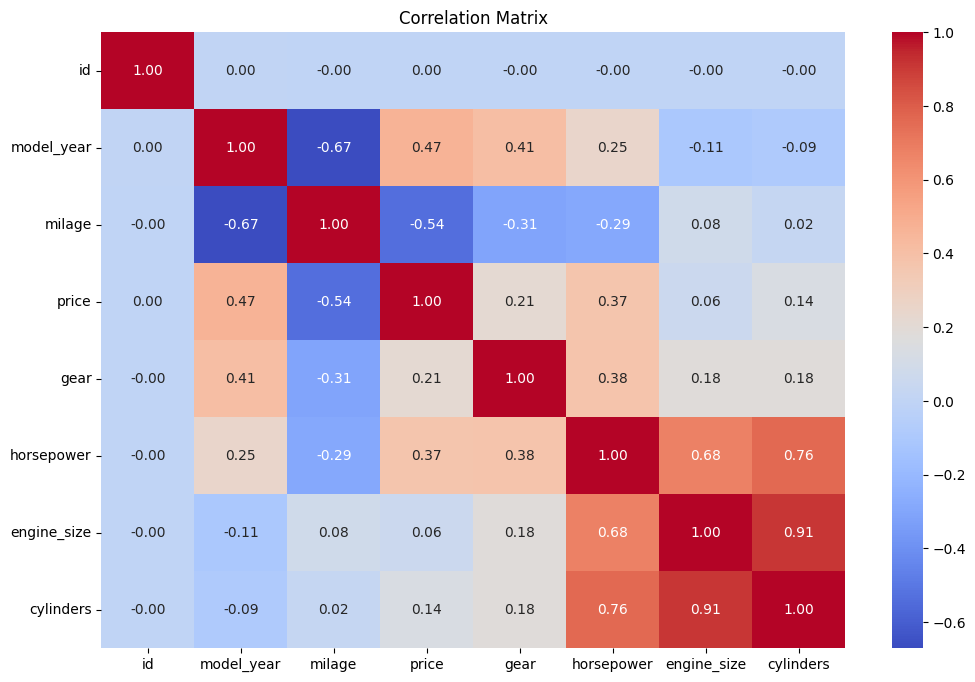

In [95]:
#Using Correlation Matrix to find the highly correlated features
# Select numerical features only
num_features = data.select_dtypes(include=[np.number])


# Compute correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(num_features.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [96]:
from xgboost import XGBRegressor

X = pd.get_dummies(data.drop(columns=["price"]))
y = data["price"]

model = XGBRegressor()
model.fit(X, y)

# Get feature importance scores
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_})
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)

print(feature_importances.tail(10))

                                     Feature  Importance
1615                model_Sierra 3500 Denali         0.0
1616                   model_Sierra 3500 SLE         0.0
1617                model_Silverado 1500 1LT         0.0
1618                model_Silverado 1500 1LZ         0.0
1619                model_Silverado 1500 2LT         0.0
1620               model_Silverado 1500 Base         0.0
1621  model_Silverado 1500 Custom Trail Boss         0.0
1622       model_Silverado 1500 High Country         0.0
1623         model_Silverado 1500 Hybrid 1HY         0.0
1612                model_Sierra 2500 Denali         0.0


In [97]:
#As engine-size and cylinders are highly correlated with correlation of 0.91
#And cylinders is more correlated with price, we will drop cylinders
data = data.drop(columns=['engine_size'])

In [98]:
data.head(1)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,trans_type,gear,horsepower,cylinders
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,Automatic,6.0,172.0,4.0


# Feature Scaling

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness level of milage is 0.7014687358115502


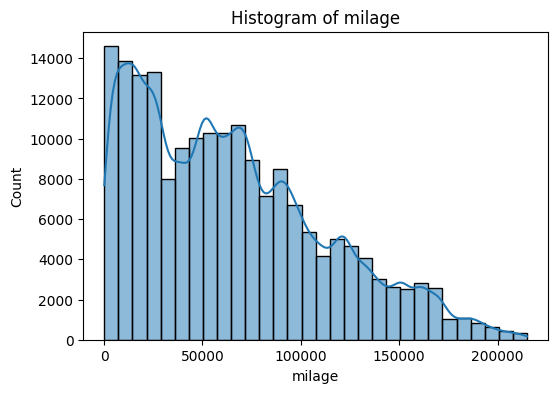

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness level of gear is -0.7681932211176693


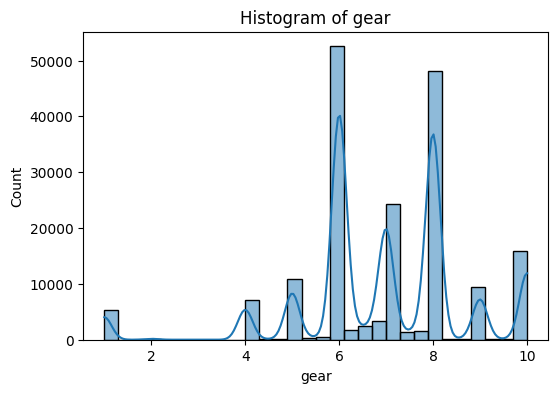

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness level of horsepower is 0.5042338152184941


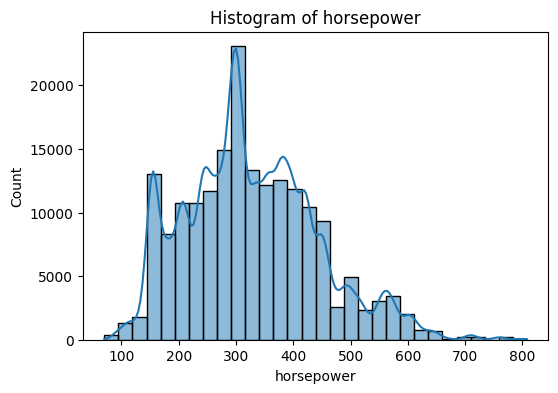

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Skewness level of cylinders is 0.06206282130504635


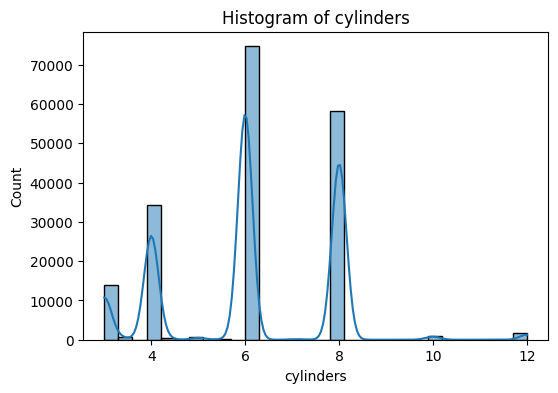

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ["milage", "gear", "horsepower", "cylinders"]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True, bins=30)
    print(f"Skewness level of {col} is {data[col].skew()}")
    plt.title(f"Histogram of {col}")
    plt.show()


In [100]:
data.price.skew()

2.8475936957535306

In [101]:
#Since we'll be using tree based model , we dont need to scale or transform the data 

In [102]:
data['test_train'] =1
test['test_train'] =0
test['price'] = np.NaN
all_data = pd.concat([data,test])
all_data

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,trans_type,gear,horsepower,cylinders,test_train,engine_size
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200.0,Automatic,6.000000,172.000000,4.0,1,NaN
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999.0,Automatic,5.000000,252.000000,8.0,1,NaN
2,2,Chevrolet,Silverado 2500 LT,2002,136731,Gasoline,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900.0,Automatic,6.000000,320.000000,8.0,1,NaN
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000.0,Other,7.217152,420.000000,8.0,1,NaN
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500.0,Automatic,7.000000,208.000000,4.0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,314218,Mercedes-Benz,GL-Class GL 450 4MATIC,2014,83315,Diesel,362.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,None reported,Yes,NaN,Automatic,7.000000,362.000000,6.0,0,3.0
125686,314219,Audi,Q7 55 Prestige,2019,29336,Diesel,3.0 Liter Turbo,Automatic,White,Black,None reported,No,NaN,Automatic,8.000000,153.800122,3.0,0,0.0
125687,314220,Audi,A6 3.0T Premium Plus,2012,77634,Diesel,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN,Automatic,8.000000,333.000000,6.0,0,3.0
125688,314221,Audi,Q7 3.0T Premium,2012,112000,Diesel,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN,Automatic,8.000000,333.000000,6.0,0,3.0


In [103]:
all_dummies = pd.get_dummies(all_data[['brand','model_year','milage','fuel_type','ext_col','int_col','accident','clean_title','trans_type','gear','horsepower','cylinders','test_train']],dtype = int)

In [104]:
all_dummies

,model_year,milage,gear,horsepower,cylinders,test_train,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,...,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_No,clean_title_Yes,trans_type_Automatic,trans_type_Manual,trans_type_Other
0,2007,213000,6.000000,172.000000,4.0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,2002,143250,5.000000,252.000000,8.0,1,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,2002,136731,6.000000,320.000000,8.0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,2017,19500,7.217152,420.000000,8.0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,2021,7388,7.000000,208.000000,4.0,1,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125685,2014,83315,7.000000,362.000000,6.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
125686,2019,29336,8.000000,153.800122,3.0,0,0,0,0,1,...,0,0,0,0,1,1,0,1,0,0
125687,2012,77634,8.000000,333.000000,6.0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0
125688,2012,112000,8.000000,333.000000,6.0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,0,0


# 5. Model Building

In [105]:
# Lets train the data
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

In [106]:
 import xgboost as xgb

In [107]:
X_train = all_dummies[all_dummies.test_train == 1].drop(['test_train'], axis =1)
X_test = all_dummies[all_dummies.test_train == 0].drop(['test_train'], axis =1)

y_train  = all_data[all_data.test_train == 1].price

In [109]:
import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [112]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameter grid
param_dist = {
    'n_estimators': [600, 800, 900, 1000],  # Reduced the range to prevent overfitting
    'learning_rate': [0.01, 0.02, 0.03],    # Increased range to find better convergence
    'max_depth': [4, 5, 6, 7],              # Added lower depth to capture simpler models
    'subsample': [0.7, 0.8, 0.9],           # Adjusted subsample range
    'colsample_bytree': [0.6, 0.7, 0.8],    # Added a lower value for experimentation
    'min_child_weight': [3, 5],              # Added min_child_weight for regularization
    'alpha': [0.0, 0.01],                    # Added L1 regularization parameter
    'lambda': [0.0, 1]                       # Added L2 regularization parameter
}

# Initialize the model
xgb_model = XGBRegressor(objective='reg:squarederror')

# Perform randomized search
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, 
                                   n_iter=20, scoring='neg_mean_squared_error', 
                                    cv= 3 , verbose=1, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-random_search.best_score_)}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 3, 'max_depth': 7, 'learning_rate': 0.02, 'lambda': 1, 'colsample_bytree': 0.6, 'alpha': 0.0}
Best RMSE: 26225.994813496975


In [113]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror',subsample = 0.8, n_estimators = 1000, min_child_weight = 3 ,max_depth = 7, learning_rate = 0.02, colsample_bytree = 0.6 , reg_lambda = 1,reg_alpha = 0.0)
scores = cross_val_score(model_xgb,X_train,y_train,cv=5,scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

# Print RMSE scores for each fold
print(f'Cross-Validated RMSE Scores: {rmse_scores}')
print(f'Mean RMSE: {rmse_scores.mean()}')

Cross-Validated RMSE Scores: [25888.70375183 26558.16476256 25820.38751104 26944.12463345
 25783.84553259]
Mean RMSE: 26199.04523829242


In [ ]:
# current Mean RMSE : 26199.04523829242
# mean after feature selection : 26276.38142581412
# mean after scaling  : 26276.38142581412
# mean after scaling again : 26197.331748028948'''

In [114]:
X_train

,model_year,milage,gear,horsepower,cylinders,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,...,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_No,clean_title_Yes,trans_type_Automatic,trans_type_Manual,trans_type_Other
0,2007,213000,6.000000,172.000000,4.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,2002,143250,5.000000,252.000000,8.0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,2002,136731,6.000000,320.000000,8.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,2017,19500,7.217152,420.000000,8.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,2021,7388,7.000000,208.000000,4.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,2017,49000,8.128533,420.000000,8.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
188529,2018,28600,8.000000,385.000000,6.0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,0,0
188530,2021,13650,7.000000,469.000000,8.0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
188531,2022,13895,1.000000,339.708031,6.0,0,0,0,1,0,...,0,0,0,0,1,1,0,1,0,0


In [115]:
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.02, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [116]:
prediction = model_xgb.predict(X_test)

In [117]:
df = {'id':test.id , 'price' : prediction}

In [118]:
submission = pd.DataFrame(data = df)
submission.to_csv('submission.csv',index = False)

In [119]:
import pickle

# Assuming 'model' is your trained model
filename = 'model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model_xgb, file)